In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('/content/VI_IDEA.csv')

#print the head
df.head()

,Date,Adj_Close
0,01-01-2015,95.008942
1,02-01-2015,95.336876
2,05-01-2015,91.550819
3,06-01-2015,89.732323
4,07-01-2015,89.285149


,Date,Adj_Close
Date,,
2015-01-01,2015-01-01,95.008942
2015-01-02,2015-01-02,95.336876
2015-01-05,2015-01-05,91.550819
2015-01-06,2015-01-06,89.732323
2015-01-07,2015-01-07,89.285149


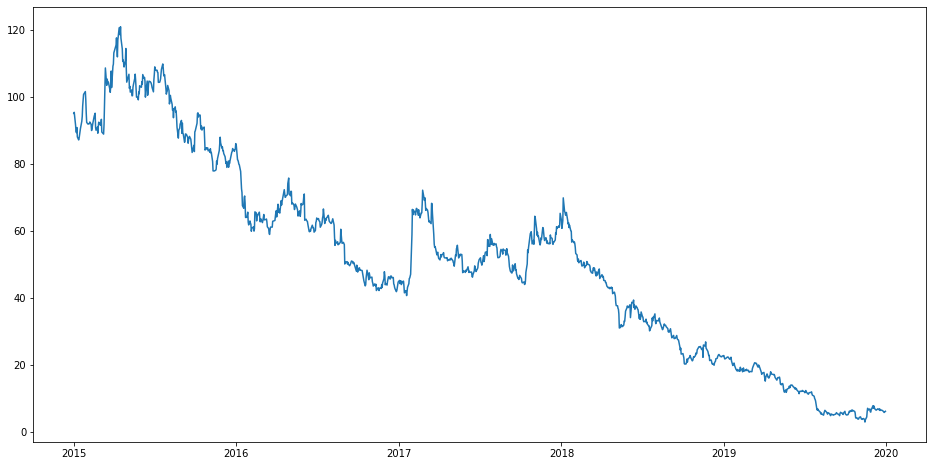

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date, dayfirst = True)

df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Adj_Close'], label='Close Price history')
df.head()

In [3]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Adj_Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Adj_Close'][i] = data['Adj_Close'][i]
new_data.head()

,Date,Adj_Close
0,2015-01-01 00:00:00,95.008942
1,2015-01-02 00:00:00,95.336876
2,2015-01-05 00:00:00,91.550819
3,2015-01-06 00:00:00,89.732323
4,2015-01-07 00:00:00,89.285149


In [4]:
from fastai.tabular import *
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

new_data.head()

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:64: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df[prefix + 'Elapsed'] = field.astype(np.int64) // 10 ** 9


,Adj_Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,95.008942,2015,1,1,1,3,1,False,True,False,True,False,True
1,95.336876,2015,1,1,2,4,2,False,False,False,False,False,False
2,91.550819,2015,1,2,5,0,5,False,False,False,False,False,False
3,89.732323,2015,1,2,6,1,6,False,False,False,False,False,False
4,89.285149,2015,1,2,7,2,7,False,False,False,False,False,False


In [5]:
#split into train and validation
split=round(len(df)*0.75)
train = new_data[:split]
valid = new_data[split:]

x_train = train.drop(columns=['Adj_Close','Dayofyear','Is_month_end','Is_month_start','Is_quarter_end','Is_quarter_start','Is_year_start','Is_year_end'], axis=1)
y_train = train['Adj_Close']
x_test = valid.drop(columns=['Adj_Close','Dayofyear','Is_month_end','Is_month_start','Is_quarter_end','Is_quarter_start','Is_year_start','Is_year_end'], axis=1)

y_test = valid['Adj_Close']
print(valid)

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

      Adj_Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
921   24.420244  2018      9    39   25          1        268         False   
922   24.993065  2018      9    39   26          2        269         False   
923   23.214308  2018      9    39   27          3        270         False   
924   23.244455  2018      9    39   28          4        271         False   
925   23.365049  2018     10    40    1          0        274         False   
...         ...   ...    ...   ...  ...        ...        ...           ...   
1223        6.4  2019     12    52   23          0        357         False   
1224        6.3  2019     12    52   24          1        358         False   
1225       6.05  2019     12    52   26          3        360         False   
1226        5.8  2019     12    52   27          4        361         False   
1227       6.15  2019     12     1   30          0        364         False   

      Is_month_start  Is_quarter_end  Is_quarter_st

LinearRegression()

In [12]:
#make predictions and find the rmse
preds = model.predict(x_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print("RMSE Value=",rms)
valid.tail


RMSE Value= 6.092698473281416


<bound method NDFrame.tail of       Adj_Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
921   24.420244  2018      9    39   25          1        268         False   
922   24.993065  2018      9    39   26          2        269         False   
923   23.214308  2018      9    39   27          3        270         False   
924   23.244455  2018      9    39   28          4        271         False   
925   23.365049  2018     10    40    1          0        274         False   
...         ...   ...    ...   ...  ...        ...        ...           ...   
1223        6.4  2019     12    52   23          0        357         False   
1224        6.3  2019     12    52   24          1        358         False   
1225       6.05  2019     12    52   26          3        360         False   
1226        5.8  2019     12    52   27          4        361         False   
1227       6.15  2019     12     1   30          0        364         False   

      Is_month_start 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


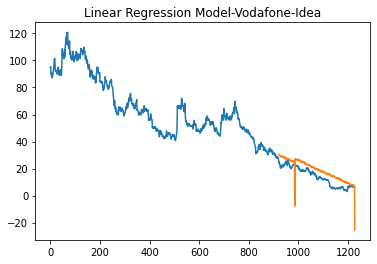

In [9]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[split:].index
train.index = new_data[:split].index
plt.title('Linear Regression Model-Vodafone-Idea')
plt.plot(new_data['Adj_Close'],label='Actual')
plt.plot(valid[ 'Predictions'],label='Predicted')